In [3]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

In [4]:
df.shape

(35040, 11)

In [5]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

/tmp/ipykernel_205078/3018716760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


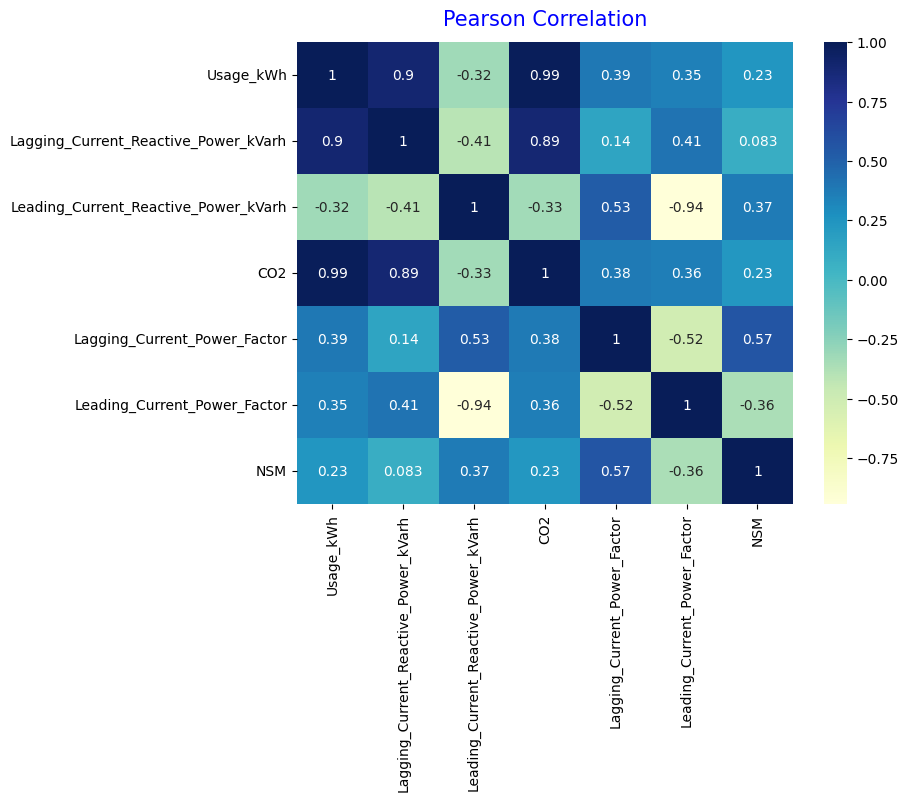

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [5]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

# df = df.set_index('date')
# print(df.index)
#df["date"] =

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# создаем новые поля "hour" и "minute"
# df['time'] = (df['date'].dt.hour * 60. + df['date'].dt.minute)
df['day'] = (df['date'].dt.day)
# df['minute'] = df['date'].dt.minute / 60.

df.drop('date', axis=1, inplace=True)

#handling categorical data
df = pd.get_dummies(df, drop_first=True)

data = df.drop('Usage_kWh', axis=1)
df_norm = (data-data.min())/(data.max()-data.min())
df_norm = df_norm - df_norm.mean()
df_norm = pd.concat((df_norm, df["Usage_kWh"]), 1)
df = df_norm

df.describe()


# train-test split for time series
# train_size = int(len(df) * 0.67)
# test_size = len(df) - train_size
# train, test = df[:train_size], df[train_size:]

# X_train = train.drop('Usage_kWh', axis = 1)
# y_train = train['Usage_kWh']
#
# X_test = test.drop('Usage_kWh', axis = 1)
# y_test = test['Usage_kWh']

# train.head()

/tmp/ipykernel_168490/2686838792.py:24: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, df["Usage_kWh"]), 1)


,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load,Usage_kWh
count,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,35040.000000
mean,1.297795e-17,1.784468e-17,3.974497e-17,-4.380058e-17,-1.784468e-17,-4.106304e-18,-6.326750e-17,1.784468e-17,1.318073e-17,-6.286194e-18,-6.286194e-18,-6.488975e-18,-6.286194e-18,-6.083414e-18,-2.838926e-18,5.434516e-17,27.386892
std,1.682592e-01,2.674518e-01,2.307260e-01,1.892132e-01,3.045654e-01,2.917022e-01,2.932124e-01,4.513883e-01,3.523129e-01,3.495322e-01,3.495322e-01,3.495322e-01,3.495322e-01,3.495322e-01,4.055471e-01,4.473794e-01,33.444380
min,-1.345102e-01,-1.394434e-01,-1.646323e-01,-8.057806e-01,-8.436787e-01,-5.000000e-01,-4.906849e-01,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,0.000000
25%,-1.107768e-01,-1.394434e-01,-1.646323e-01,-1.725806e-01,1.533213e-01,-2.500000e-01,-2.573516e-01,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,3.200000
50%,-8.291594e-02,-1.394434e-01,-1.646323e-01,7.381944e-02,1.563213e-01,0.000000e+00,9.315068e-03,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,4.570000
75%,9.910862e-02,-6.415521e-02,1.210820e-01,1.844444e-01,1.563213e-01,2.500000e-01,2.426484e-01,7.150685e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,7.232877e-01,51.237500
max,8.654898e-01,8.605566e-01,8.353677e-01,1.942194e-01,1.563213e-01,5.000000e-01,5.093151e-01,7.150685e-01,8.547945e-01,8.575342e-01,8.575342e-01,8.575342e-01,8.575342e-01,8.575342e-01,7.924658e-01,7.232877e-01,157.180000


/tmp/ipykernel_384546/1523684375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


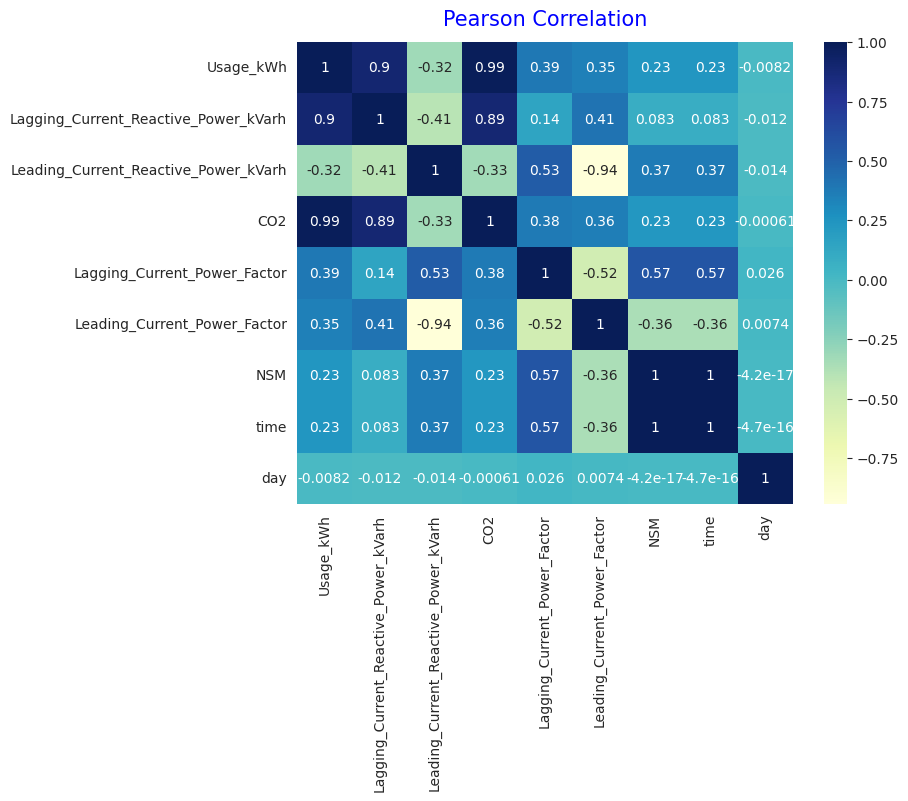

In [115]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [9]:
# import pandas as pd
# import numpy as np
#
# # создаем пример DataFrame
# df = pd.DataFrame({'A': [1, 2., 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
#
# # преобразовываем DataFrame в массив NumPy
# array = df.values
#
# print(array)

In [17]:
import torch


def create_dataset(dataset, lookback, shift):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range((len(dataset) - lookback - 1) // shift):
        feature = dataset[i * shift : i *shift + lookback].values
        target = dataset[i * shift + lookback : i * shift + lookback + 1]['Usage_kWh'].values
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

def create_dataset2(dataset, lookback, shift):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range((len(dataset) - lookback - 1) // shift):
        feature = dataset[i * shift : i *shift + lookback].values
        target = dataset[i * shift + lookback : i * shift + lookback + 1]['Usage_kWh'].values
        X.append(feature)
        y.append(target)
    return X, y


lookback = 16
shift = 4
# X_train, y_train = create_dataset(train, lookback, shift)
# X_test, y_test = create_dataset(test, lookback, shift)
X, y = create_dataset2(df, lookback, shift)
train_size = int(len(X) * 0.67)
test_size = len(df) - train_size

tt = torch.tensor
# import random
# random.shuffle(X)
# random.shuffle(y)

X_train, y_train = tt(X[:train_size]), tt(y[:train_size])
X_test, y_test = tt(X[train_size:]), tt(y[train_size:])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test[0][0][0])


torch.Size([5865, 16, 17]) torch.Size([5865, 1])
torch.Size([2890, 16, 17]) torch.Size([2890, 1])
tensor(-0.0521, dtype=torch.float64)


In [8]:
import torch
import torch.nn as nn


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh').double()
        #self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True).double()
        self.fc1 = nn.Linear(hidden_size, hidden_size//2).double()
        self.fc2 = nn.Linear(hidden_size//2, output_size).double()
        self.relu = nn.ReLU().double()

        # for name, param in self.rnn.named_parameters():
        #     if 'weight_ih' in name:
        #         torch.nn.init.xavier_uniform_(param)
        #         print(param.shape)
        #     elif 'weight_hh' in name:
        #         torch.nn.init.orthogonal_(param)
        #         print("here")
        #     elif 'bias' in name:
        #         torch.nn.init.constant_(param, 0.0)

    def forward(self, x):
        out, _ = self.rnn(x)
        # Decode the hidden state of the last time step
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        return out
        # return out[:, -1, :]

In [12]:
learning_rate = 0.01

model = RNNModel(10, 10, 1, 5)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

import torch.utils.data as data

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

for X_batch, y_batch in loader:
    print(X_batch.shape)
    print(y_batch.shape)
    break

# for i in model.parameters():
#     print(i)
#     break

torch.Size([8, 1, 17])
torch.Size([8, 1])


0
Epoch 0: train RMSE 41.8796, test RMSE 36.7655


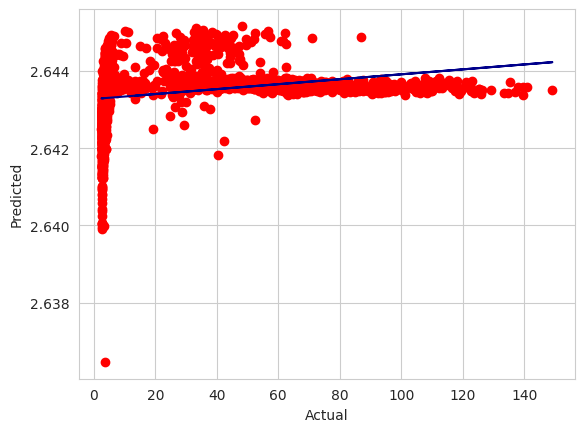

1
Epoch 1: train RMSE 39.3184, test RMSE 34.3736
2
Epoch 2: train RMSE 36.6221, test RMSE 32.0047
3
Epoch 3: train RMSE 33.5736, test RMSE 28.9396
4
Epoch 4: train RMSE 29.6209, test RMSE 25.2744
5
Epoch 5: train RMSE 26.2411, test RMSE 22.2060
6
Epoch 6: train RMSE 23.8926, test RMSE 20.2463
7
Epoch 7: train RMSE 22.8870, test RMSE 19.5817
8
Epoch 8: train RMSE 21.8544, test RMSE 18.5607
9
Epoch 9: train RMSE 20.2709, test RMSE 17.4476
10
Epoch 10: train RMSE 19.4002, test RMSE 16.5512


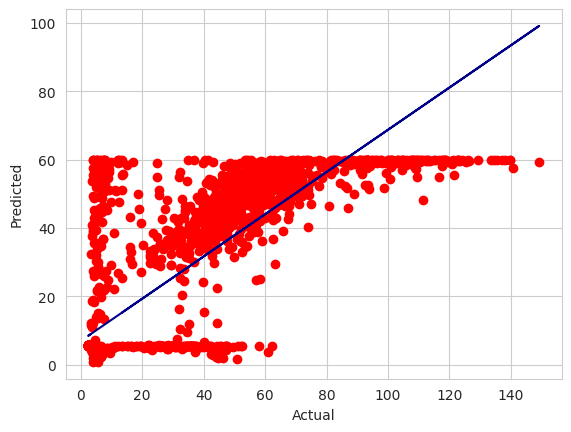

11
Epoch 11: train RMSE 18.3358, test RMSE 15.7277
12
Epoch 12: train RMSE 17.7161, test RMSE 14.8790
13
Epoch 13: train RMSE 17.1283, test RMSE 14.4706
14
Epoch 14: train RMSE 16.7848, test RMSE 14.2171
15
Epoch 15: train RMSE 16.5589, test RMSE 14.0453
16
Epoch 16: train RMSE 16.4191, test RMSE 13.9464
17
Epoch 17: train RMSE 16.3087, test RMSE 13.8716
18
Epoch 18: train RMSE 16.2004, test RMSE 13.8276
19
Epoch 19: train RMSE 16.1151, test RMSE 13.7714
20
Epoch 20: train RMSE 16.0326, test RMSE 13.6910


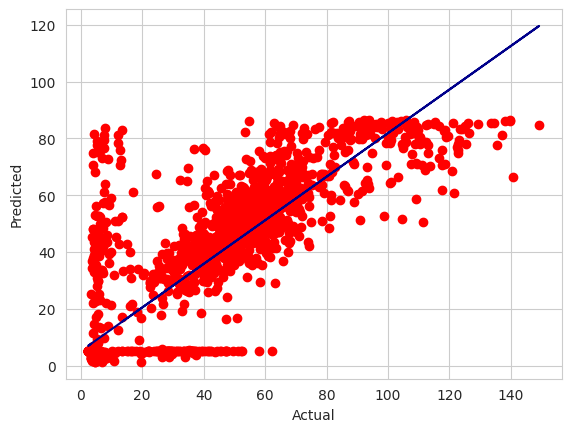

21
Epoch 21: train RMSE 16.0110, test RMSE 13.6696
22
Epoch 22: train RMSE 16.0431, test RMSE 13.6839
23
Epoch 23: train RMSE 15.6534, test RMSE 13.5255
24
Epoch 24: train RMSE 15.5607, test RMSE 13.5388
25
Epoch 25: train RMSE 15.5156, test RMSE 13.4739
26
Epoch 26: train RMSE 15.4023, test RMSE 13.4634
27
Epoch 27: train RMSE 15.6146, test RMSE 13.6980
28
Epoch 28: train RMSE 15.3653, test RMSE 13.5207
29
Epoch 29: train RMSE 15.7251, test RMSE 13.8152
30
Epoch 30: train RMSE 15.5666, test RMSE 13.6803


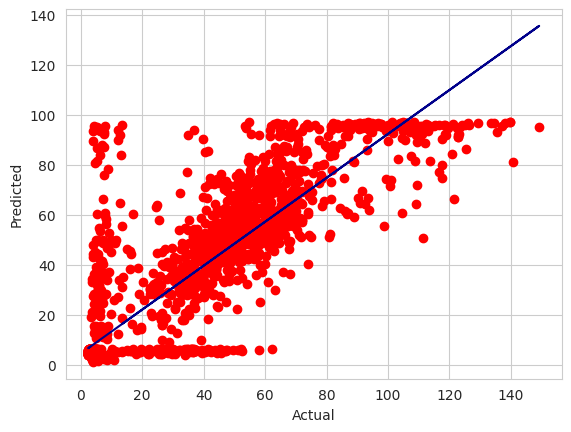

31
Epoch 31: train RMSE 15.1277, test RMSE 13.3793
32
Epoch 32: train RMSE 14.8828, test RMSE 13.2826
33
Epoch 33: train RMSE 13.5823, test RMSE 12.4874
34
Epoch 34: train RMSE 14.0717, test RMSE 12.6416
35
Epoch 35: train RMSE 13.0883, test RMSE 11.8388
36
Epoch 36: train RMSE 13.0314, test RMSE 11.7388
37
Epoch 37: train RMSE 12.8946, test RMSE 11.9212
38
Epoch 38: train RMSE 12.7762, test RMSE 11.6176
39
Epoch 39: train RMSE 12.8192, test RMSE 11.5316
40
Epoch 40: train RMSE 12.7269, test RMSE 11.4587


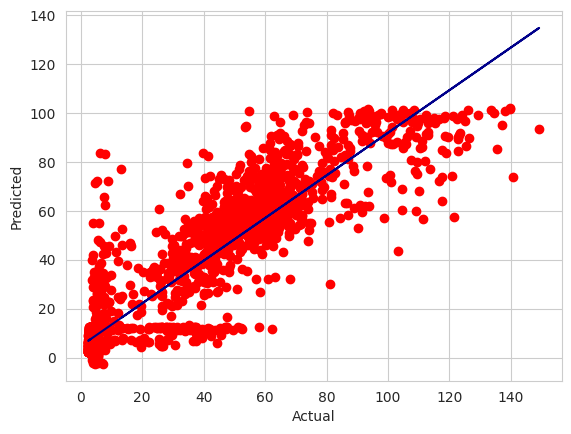

41
Epoch 41: train RMSE 12.5602, test RMSE 11.4471
42
Epoch 42: train RMSE 12.7717, test RMSE 11.6745
43
Epoch 43: train RMSE 12.4468, test RMSE 11.4115
44
Epoch 44: train RMSE 15.3524, test RMSE 14.0680
45
Epoch 45: train RMSE 12.7115, test RMSE 11.6440
46
Epoch 46: train RMSE 12.7605, test RMSE 11.8897
47
Epoch 47: train RMSE 12.1571, test RMSE 11.1995
48
Epoch 48: train RMSE 12.2193, test RMSE 11.3738
49
Epoch 49: train RMSE 12.1308, test RMSE 11.4097
50
Epoch 50: train RMSE 12.1173, test RMSE 11.4521


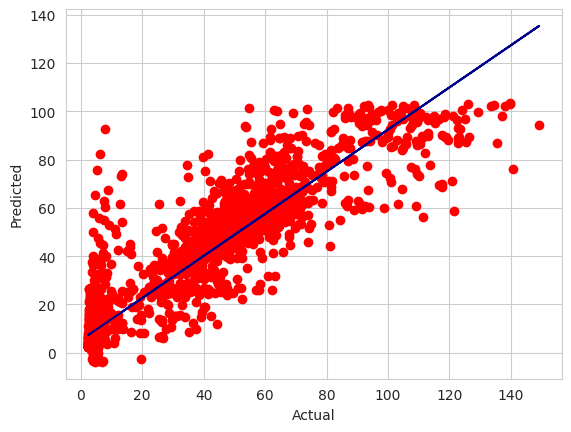

51
Epoch 51: train RMSE 12.0963, test RMSE 11.3623
52
Epoch 52: train RMSE 11.9131, test RMSE 11.0703
53
Epoch 53: train RMSE 11.9441, test RMSE 11.2092
54
Epoch 54: train RMSE 11.8797, test RMSE 11.2112
55
Epoch 55: train RMSE 11.8969, test RMSE 11.2509
56
Epoch 56: train RMSE 11.7675, test RMSE 11.0287
57
Epoch 57: train RMSE 11.5328, test RMSE 10.8187
58
Epoch 58: train RMSE 11.7415, test RMSE 11.1327
59
Epoch 59: train RMSE 11.5829, test RMSE 10.9628
60
Epoch 60: train RMSE 11.5307, test RMSE 10.9292


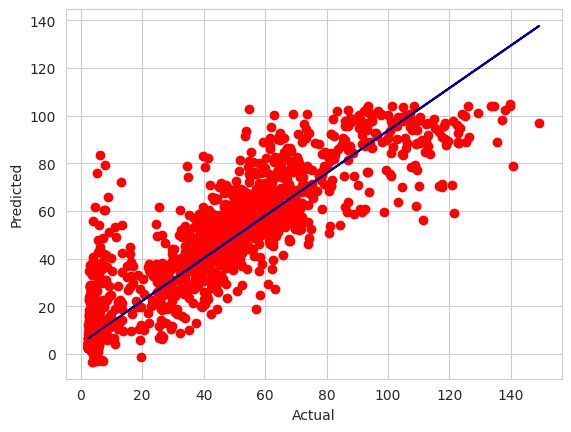

61
Epoch 61: train RMSE 11.5069, test RMSE 10.9488
62
Epoch 62: train RMSE 11.2833, test RMSE 10.5804
63
Epoch 63: train RMSE 11.4857, test RMSE 11.0591
64
Epoch 64: train RMSE 11.4188, test RMSE 11.0126
65
Epoch 65: train RMSE 11.1298, test RMSE 10.7165
66
Epoch 66: train RMSE 11.3392, test RMSE 10.9408
67
Epoch 67: train RMSE 11.0187, test RMSE 10.4334
68
Epoch 68: train RMSE 11.2610, test RMSE 10.7062
69
Epoch 69: train RMSE 11.0779, test RMSE 10.6885
70
Epoch 70: train RMSE 11.2956, test RMSE 10.9333


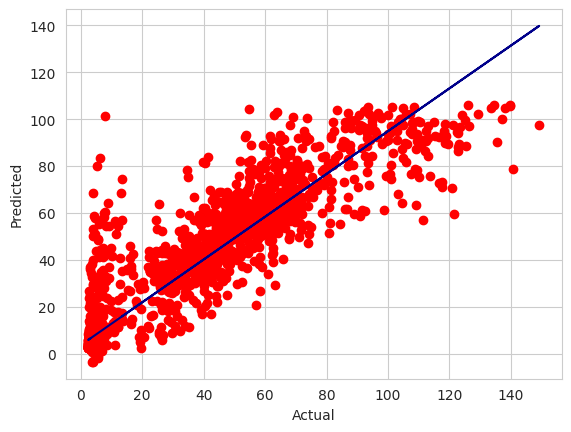

71
Epoch 71: train RMSE 11.5045, test RMSE 11.3040
72
Epoch 72: train RMSE 11.3408, test RMSE 10.8773
73
Epoch 73: train RMSE 10.8959, test RMSE 10.2810
74
Epoch 74: train RMSE 11.0182, test RMSE 10.5221
75
Epoch 75: train RMSE 10.9734, test RMSE 10.5389
76
Epoch 76: train RMSE 11.0017, test RMSE 10.6714
77
Epoch 77: train RMSE 10.9732, test RMSE 10.5176
78
Epoch 78: train RMSE 11.5757, test RMSE 11.2618
79
Epoch 79: train RMSE 10.9003, test RMSE 10.3596
80
Epoch 80: train RMSE 11.5668, test RMSE 11.0185


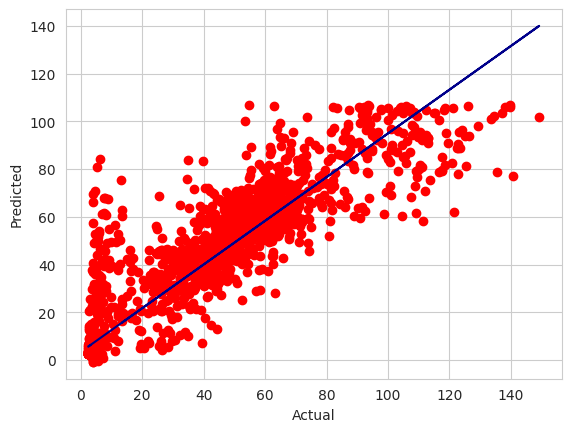

81
Epoch 81: train RMSE 12.1122, test RMSE 11.8061
82
Epoch 82: train RMSE 12.0746, test RMSE 11.7343
83
Epoch 83: train RMSE 11.0642, test RMSE 10.7011
84
Epoch 84: train RMSE 11.5669, test RMSE 11.3375
85
Epoch 85: train RMSE 11.3413, test RMSE 11.1434
86
Epoch 86: train RMSE 11.2699, test RMSE 11.0972
87
Epoch 87: train RMSE 11.3871, test RMSE 11.1826
88
Epoch 88: train RMSE 11.3280, test RMSE 11.2032
89
Epoch 89: train RMSE 10.7817, test RMSE 10.1694
90
Epoch 90: train RMSE 10.7204, test RMSE 10.1854


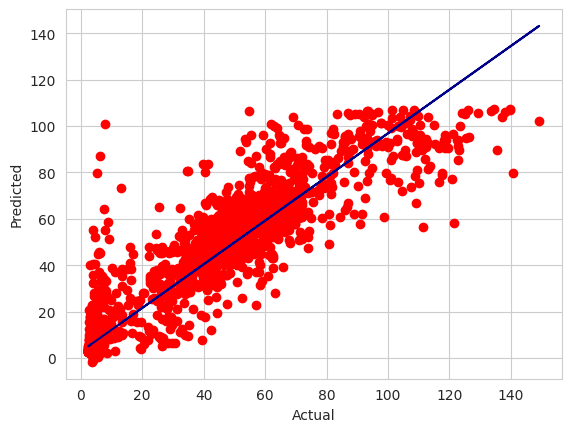

91
Epoch 91: train RMSE 11.4740, test RMSE 11.1775
92
Epoch 92: train RMSE 11.0417, test RMSE 10.7570
93
Epoch 93: train RMSE 11.0733, test RMSE 10.8326
94
Epoch 94: train RMSE 11.5681, test RMSE 11.4665
95
Epoch 95: train RMSE 10.6495, test RMSE 10.1580
96
Epoch 96: train RMSE 12.1143, test RMSE 11.9242
97
Epoch 97: train RMSE 10.9580, test RMSE 10.8035
98
Epoch 98: train RMSE 10.9916, test RMSE 10.8794
99
Epoch 99: train RMSE 11.1187, test RMSE 11.0927
100
Epoch 100: train RMSE 10.7171, test RMSE 10.4526


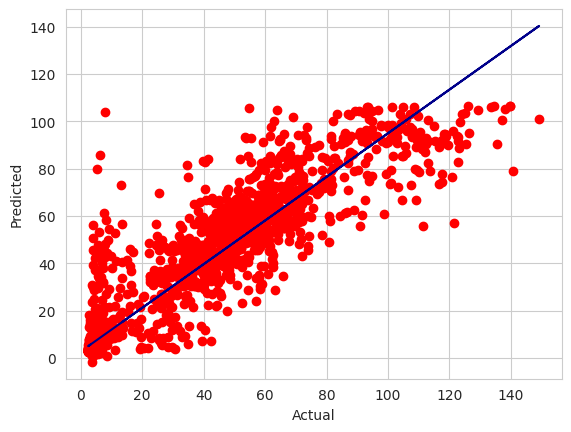

101
Epoch 101: train RMSE 10.7363, test RMSE 10.4825
102
Epoch 102: train RMSE 10.6848, test RMSE 10.5278
103
Epoch 103: train RMSE 10.6704, test RMSE 10.4826
104
Epoch 104: train RMSE 10.8394, test RMSE 10.7892
105
Epoch 105: train RMSE 10.7790, test RMSE 10.8168
106
Epoch 106: train RMSE 10.7462, test RMSE 10.6981
107
Epoch 107: train RMSE 10.3827, test RMSE 9.9845
108
Epoch 108: train RMSE 10.5223, test RMSE 10.4358
109
Epoch 109: train RMSE 10.8789, test RMSE 11.0854
110
Epoch 110: train RMSE 10.6096, test RMSE 10.6463


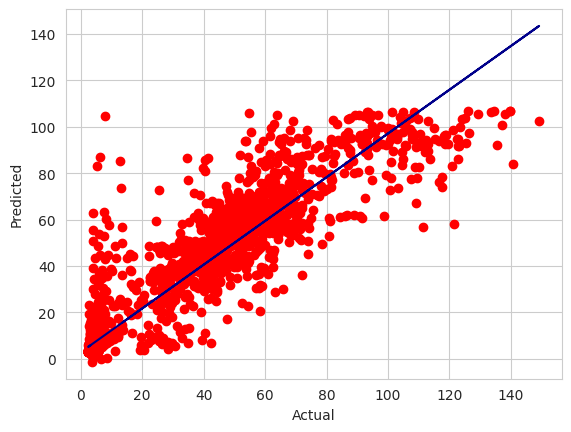

111
Epoch 111: train RMSE 10.6557, test RMSE 10.7678
112
Epoch 112: train RMSE 10.5177, test RMSE 10.4569
113
Epoch 113: train RMSE 10.3414, test RMSE 10.0151
114
Epoch 114: train RMSE 10.5219, test RMSE 10.2457
115
Epoch 115: train RMSE 10.6027, test RMSE 10.5903
116
Epoch 116: train RMSE 11.0332, test RMSE 11.3057
117
Epoch 117: train RMSE 10.7334, test RMSE 10.7810
118
Epoch 118: train RMSE 10.9825, test RMSE 11.1295
119
Epoch 119: train RMSE 10.4512, test RMSE 9.7145
120
Epoch 120: train RMSE 10.5075, test RMSE 10.4478


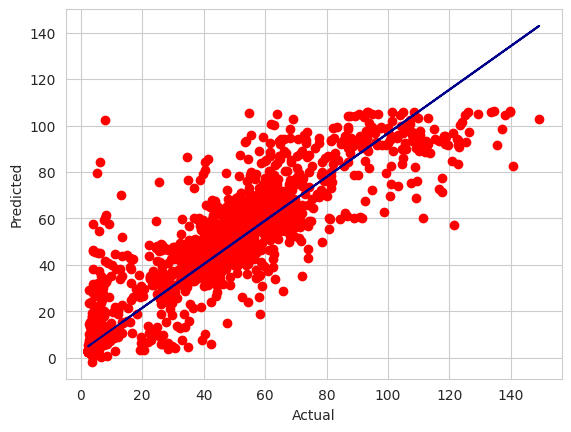

121
Epoch 121: train RMSE 10.8182, test RMSE 10.8675
122
Epoch 122: train RMSE 10.2591, test RMSE 10.0900
123
Epoch 123: train RMSE 11.1429, test RMSE 11.2687
124
Epoch 124: train RMSE 10.5409, test RMSE 10.6661
125
Epoch 125: train RMSE 10.8240, test RMSE 10.9578
126
Epoch 126: train RMSE 10.2469, test RMSE 10.1059
127
Epoch 127: train RMSE 10.4701, test RMSE 10.6301
128
Epoch 128: train RMSE 10.7342, test RMSE 11.0377
129
Epoch 129: train RMSE 10.4751, test RMSE 10.4203
130
Epoch 130: train RMSE 11.0095, test RMSE 11.2762


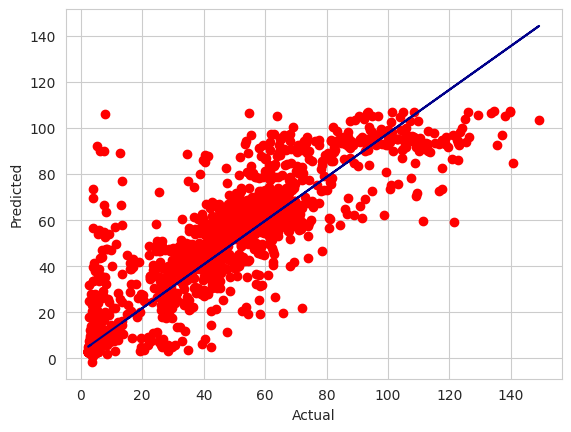

131
Epoch 131: train RMSE 10.5204, test RMSE 10.6946
132
Epoch 132: train RMSE 10.5210, test RMSE 10.7230
133
Epoch 133: train RMSE 10.4161, test RMSE 10.4697
134
Epoch 134: train RMSE 10.6402, test RMSE 10.7107
135
Epoch 135: train RMSE 10.3712, test RMSE 10.4805
136
Epoch 136: train RMSE 10.5985, test RMSE 10.7546
137
Epoch 137: train RMSE 10.4817, test RMSE 10.4802
138
Epoch 138: train RMSE 10.6865, test RMSE 10.7418
139
Epoch 139: train RMSE 11.3492, test RMSE 11.7353
140
Epoch 140: train RMSE 10.3098, test RMSE 10.4570


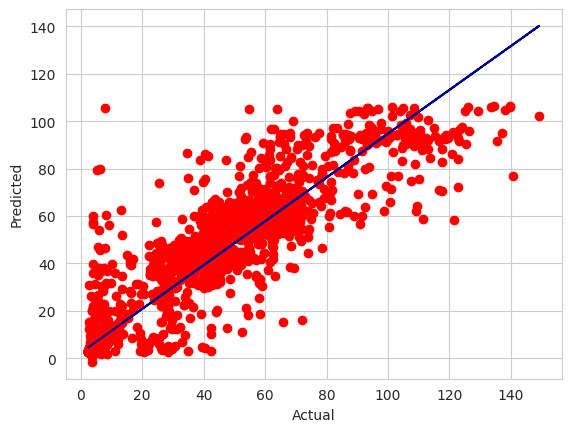

141
Epoch 141: train RMSE 10.1313, test RMSE 10.0377
142
Epoch 142: train RMSE 10.0650, test RMSE 10.1434
143
Epoch 143: train RMSE 10.9216, test RMSE 11.3046
144
Epoch 144: train RMSE 10.3270, test RMSE 10.4592
145
Epoch 145: train RMSE 10.0408, test RMSE 10.2069
146
Epoch 146: train RMSE 11.8598, test RMSE 12.0713
147
Epoch 147: train RMSE 10.1354, test RMSE 10.4367
148
Epoch 148: train RMSE 10.0446, test RMSE 10.3613
149
Epoch 149: train RMSE 11.3500, test RMSE 11.7812
150
Epoch 150: train RMSE 10.0774, test RMSE 10.2775


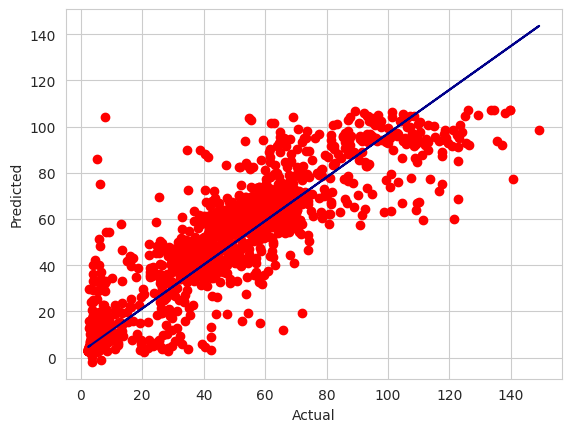

151
Epoch 151: train RMSE 10.0398, test RMSE 10.6030
152
Epoch 152: train RMSE 9.9323, test RMSE 10.2135
153
Epoch 153: train RMSE 9.9293, test RMSE 10.3185
154


In [ ]:
from tqdm import tqdm

import numpy as np
import torch.optim as optim
import torch.utils.data as data
import time

num_layers = 3

# model = RNNModel(18, 8, 1, num_layers)
model = RNNModel(17, 18, 1, num_layers)

# optimizer = optim.SGD(model.parameters(), lr=0.0000001, momentum=0.9)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=False, batch_size=64)

n_epochs = 1000
for epoch in range(n_epochs):
    print(epoch)
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        #print(y_pred)
        #print(X_batch)
        #print(time.sleep(3))
        loss = loss_fn(y_pred, y_batch)
        #print(np.sqrt(loss.detach().numpy()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    #
    # break

    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    if epoch % 10 == 0:
        x = torch.squeeze(y_test).numpy()
        y = y_pred.numpy()

        # plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
        plt.plot(x, y, 'o', color = 'r')

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m * x + b, color = 'darkblue')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show()

    # print(y_pred[:10], y_test[:10])
    # for i in range(100):
    #     print(y_pred[i][0]-y_test[i][0])
    # print(X_test[:10])
    #break